# Project 1 손글씨를 분류하기

In [106]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

#### 손글씨 데이터 불러오기

In [107]:
digits = load_digits()
X = digits.data
y = digits.target

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (1797, 64)
y shape:  (1797,)


In [108]:
print(f"target names : {digits.target_names}\n\n")

target names : [0 1 2 3 4 5 6 7 8 9]




**손글씨 데이터 Description**

In [109]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### Train set과 Test set 나누기

In [110]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f"train x : {train_x.shape}")
print(f"train y : {train_y.shape}")
print(f"test x : {test_x.shape}")
print(f"test y : {test_y.shape}")

train x : (1437, 64)
train y : (1437,)
test x : (360, 64)
test y : (360,)


#### 데이터 1개 보고 넘어가기

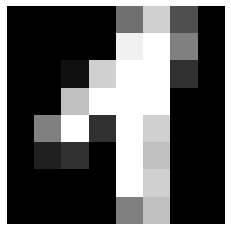

In [111]:
import matplotlib.pyplot as plt

plt.imshow(test_x[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

#### 여러 모델로 학습시키기

In [112]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "svm": svm.SVC(),
    "sgd": SGDClassifier(),
    "LogisticRegression": LogisticRegression()
}

for name, model in models.items():
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    print(name)
    print(classification_report(test_y, pred_y))
    print("Acc: ", accuracy_score(test_y, pred_y))
    print("-"*60)

DecisionTree
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.82      0.92      0.87        36
           2       0.90      0.85      0.88        33
           3       0.77      0.80      0.79        46
           4       0.76      0.84      0.80        31
           5       0.97      0.83      0.90        36
           6       0.86      0.92      0.89        39
           7       0.88      0.79      0.83        38
           8       0.74      0.72      0.73        36
           9       0.81      0.83      0.82        35

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

Acc:  0.8416666666666667
------------------------------------------------------------
RandomForest
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0

/home/suwan/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 결론

총 5개의 모델로 학습을 진행했다. Accuracy 뿐만 아니라 Precision, Recall에 대한 평가도 보았지만 손글씨 특성상 Precision과 Recall이 중요하다는 생각이 들지는 않는다. 둘 값을 고려한 F1 score와 Accuracy를 비교해봤을 때 높은 성능을 보이는 SVM이 손글씨 데이터에 가장 적합하다.

---

# Project 2 와인을 분류해 봅시다

In [113]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [114]:
wine = load_wine()

X = wine.data
y = wine.target

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (178, 13)
y shape:  (178,)


In [115]:
print(f"target names : {wine.target_names}")

target names : ['class_0' 'class_1' 'class_2']


**wine 데이터 Description**

In [116]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### Train set과 Test set 나누기

In [117]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f"train x : {train_x.shape}")
print(f"train y : {train_y.shape}")
print(f"test x : {test_x.shape}")
print(f"test y : {test_y.shape}")

train x : (142, 13)
train y : (142,)
test x : (36, 13)
test y : (36,)


#### 여러 모델로 학습시키기

In [118]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "svm": svm.SVC(),
    "sgd": SGDClassifier(),
    "LogisticRegression": LogisticRegression()
}

for name, model in models.items():
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    print(name)
    print(classification_report(test_y, pred_y))
    print("ACC : ", accuracy_score(test_y, pred_y))
    print("-"*60)

DecisionTree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36

ACC :  0.9444444444444444
------------------------------------------------------------
RandomForest
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

ACC :  0.9722222222222222
------------------------------------------------------------
svm
              precision    recall 

/home/suwan/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/suwan/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/suwan/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/suwa

### 결론

손글씨 데이터와 마찬가지로 총 5개의 모델로 학습을 진행했다. 마찬가지로 `classification_report`와 `accuracy_score`를 통해 평가를 했다. wine을 분류하는 이 프로젝트에서는 LogisticRegression이 가장 높은 성능을 보인다. 현재의 결과를 모든 score에서 만점을 받았다. 

---

# Project 3 유방암 여부를 진단해 봅시다.

In [119]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [122]:
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (569, 30)
y shape:  (569,)


In [123]:
print(f"target names : {breast_cancer.target_names}")

target names : ['malignant' 'benign']


**유방암 데이터 Description**

In [124]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### Train set과 Test set 나누기

In [125]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f"train x : {train_x.shape}")
print(f"train y : {train_y.shape}")
print(f"test x : {test_x.shape}")
print(f"test y : {test_y.shape}")

train x : (455, 30)
train y : (455,)
test x : (114, 30)
test y : (114,)


#### 여러 모델로 학습시키기

In [126]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "svm": svm.SVC(),
    "sgd": SGDClassifier(),
    "LogisticRegression": LogisticRegression()
}

for name, model in models.items():
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    print(name)
    print(classification_report(test_y, pred_y))
    print("ACC : ", accuracy_score(test_y, pred_y))
    print("-"*60)

DecisionTree
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.97      0.96      0.96        70

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

ACC :  0.956140350877193
------------------------------------------------------------
RandomForest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.99      0.99      0.99        70

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ACC :  0.9824561403508771
------------------------------------------------------------
svm
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        44
           1       0.91      1.00 

/home/suwan/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 결론

이번에도 분류문제다보니 마찬가지로 총 5개의 모델로 학습을 진행했다.`classification_report`와 `accuracy_score`를 통해 평가를 했다. 유방암 여부를 분류하는 이 프로젝트에서는 RandomForest가 가장 높은 성능을 보인다. Accuracy Score에서 제일 좋은 평가를 받았으며 precision 및 recall이 안정적이다.